In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

> Cartogram

## 2017년소멸위험지수 지도

In [4]:
data_draw_korea = pd.read_csv('2017지도.csv', encoding='CP949')
data_draw_korea

,소멸위험지수,shortName,x,y,면적,광역시도,행정구역
0,0.609775,강릉,11,4,1040.07,강원도,강릉시
1,0.370258,고성(강원),9,0,664.19,강원도,고성군
2,0.561148,동해,11,5,180.01,강원도,동해시
3,0.467135,삼척,11,8,1185.80,강원도,삼척시
4,0.598071,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
223,0.590469,제천,8,10,882.47,충청북도,제천시
224,0.855550,증평,6,11,81.84,충청북도,증평군
225,0.752400,진천,5,11,406.08,충청북도,진천군
226,1.244300,청주,6,12,932.51,충청북도,청주시


In [5]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [6]:
data_draw_korea.head()

,소멸위험지수,shortName,x,y,면적,광역시도,행정구역
0,0.609775,강릉,11,4,1040.07,강원도,강릉시
1,0.370258,고성(강원),9,0,664.19,강원도,고성군
2,0.561148,동해,11,5,180.01,강원도,동해시
3,0.467135,삼척,11,8,1185.80,강원도,삼척시
4,0.598071,속초,9,1,105.25,강원도,속초시


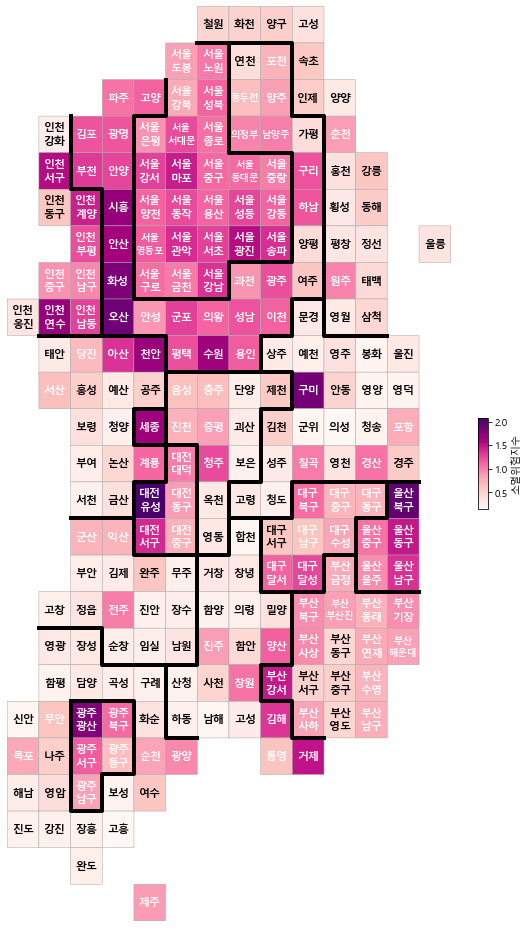

In [10]:
drawKorea('소멸위험지수', data_draw_korea, '광역시도', '행정구역', 'RdPu')

In [12]:
data_draw_korea.sort_values(by = '소멸위험지수',ascending=False)

,소멸위험지수,shortName,x,y,면적,광역시도,행정구역
106,2.077301,대전유성,4,13,177.16,대전광역시,유성구
152,1.948054,울산북구,12,13,80.41,울산광역시,북구
39,1.892675,오산,3,8,42.74,경기도,오산시
70,1.867804,구미,9,10,616.10,경상북도,구미시
48,1.816538,화성,3,7,688.10,경기도,화성시
...,...,...,...,...,...,...,...
53,0.165786,남해,6,19,357.00,경상남도,남해군
66,0.163555,합천,7,14,983.42,경상남도,합천군
71,0.157395,군위,9,11,614.15,경상북도,군위군
85,0.143746,의성,10,11,1175.89,경상북도,의성군


## 2018년소멸위험지수 지도

In [28]:
data_draw_korea = pd.read_csv('2018지도.csv', encoding='CP949')
data_draw_korea

,소멸위험지수,shortName,x,y,면적,광역시도,행정구역
0,0.582831,강릉,11,4,1040.07,강원도,강릉시
1,0.353151,고성(강원),9,0,664.19,강원도,고성군
2,0.509587,동해,11,5,180.01,강원도,동해시
3,0.452163,삼척,11,8,1185.80,강원도,삼척시
4,0.565665,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
223,0.552377,제천,8,10,882.47,충청북도,제천시
224,0.815049,증평,6,11,81.84,충청북도,증평군
225,0.775565,진천,5,11,406.08,충청북도,진천군
226,1.181851,청주,6,12,932.51,충청북도,청주시


In [24]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

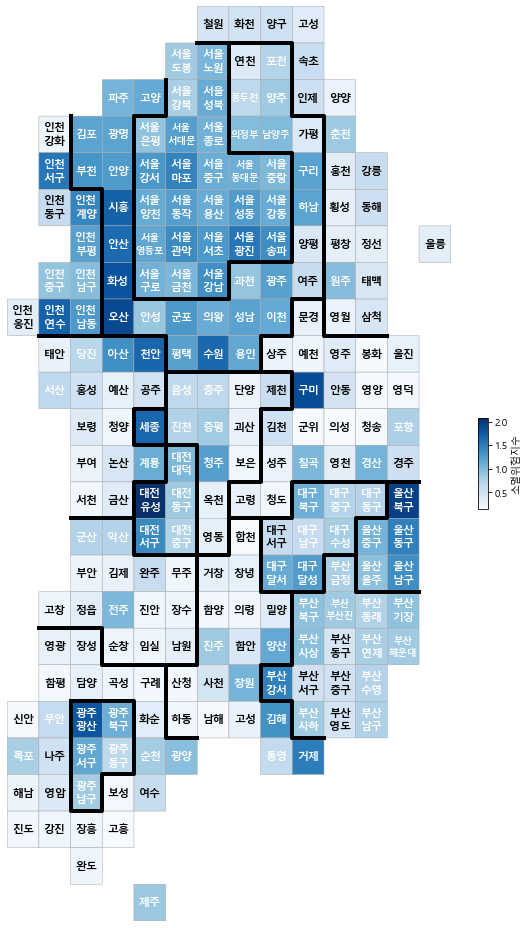

In [26]:
drawKorea('소멸위험지수', data_draw_korea, '광역시도', '행정구역', 'Blues')

In [29]:
data_draw_korea.sort_values(by = '소멸위험지수',ascending=False)

,소멸위험지수,shortName,x,y,면적,광역시도,행정구역
106,1.910200,대전유성,4,13,177.16,대전광역시,유성구
152,1.886272,울산북구,12,13,80.41,울산광역시,북구
48,1.814504,화성,3,7,688.10,경기도,화성시
39,1.813638,오산,3,8,42.74,경기도,오산시
70,1.727899,구미,9,10,616.10,경상북도,구미시
...,...,...,...,...,...,...,...
53,0.163055,남해,6,19,357.00,경상남도,남해군
66,0.157787,합천,7,14,983.42,경상남도,합천군
71,0.155378,군위,9,11,614.15,경상북도,군위군
166,0.142738,고흥,3,22,775.85,전라남도,고흥군
